In [1]:
import gpforecaster as gpf
import htsmodels as hts
import tsaugmentation as tsag
import matplotlib.pyplot as plt
import os

/home/mach1ne/anaconda3/envs/run_models_gpytorch/lib/python3.9/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
dataset_name = 'tourism'
dataset = tsag.preprocessing.PreprocessDatasets(dataset_name)
groups = dataset.apply_preprocess()

In [4]:
# Store original results

for transf in ['jitter', 'time_warp', 'magnitude_warp', 'scaling']:
    algorithm = 'gpf'
    gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups)
    model, like = gpf_model.train()
    mean, lower, upper = gpf_model.predict(model, like)
    res = gpf_model.metrics(mean)
    gpf_model.store_metrics(res)

    algorithm = 'mint'
    mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', 
                           groups=groups, 
                           aggregate_key = '(State / Zone / Region) * Purpose')
    forecasts = mint.train()
    results = mint.results(forecasts)
    res = mint.metrics(results)
    mint.store_metrics(res)

    algorithm = 'deepar'
    deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups=groups)
    model = deepar.train()
    forecasts = deepar.predict(model)
    results = deepar.results(forecasts)
    res = deepar.metrics(results)
    deepar.store_metrics(res)

R[write to console]: ── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

R[write to console]: ✔ tibble      3.1.5      ✔ tsibble     1.1.1 
✔ dplyr       1.0.7      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.4      ✔ feasts      0.2.2 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.5      

R[write to console]: ── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

100%|██████████| 304/304 [00:01<00:00, 175.87it/s]
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
100%|██████████| 50/50 [00:02<00:00, 24.23it/s, epoch=14/100, avg_epoch_loss=4.29]


100%|██████████| 304/304 [00:01<00:00, 168.42it/s]
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
100%|██████████| 304/304 [00:01<00:00, 176.86it/s]


In [3]:
data = tsag.transformations.CreateTransformedVersions(dataset_name)
data.parameters = {"jitter": 1.5,
                   "scaling": 0.3,
                   "magnitude_warp": 0.3,
                   "time_warp": 0.005}

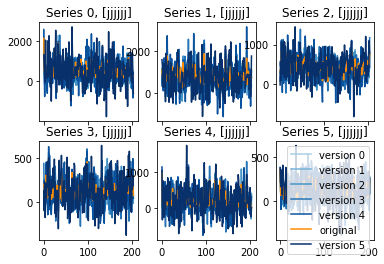

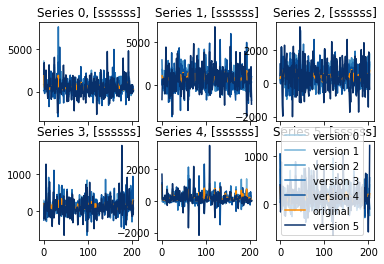

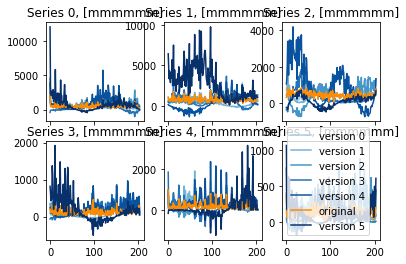

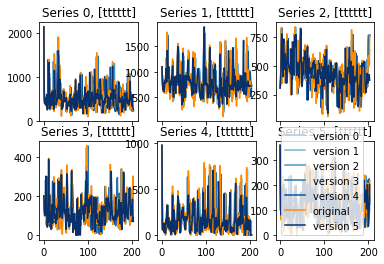

In [4]:
data.create_new_version_single_transf()

In [5]:
vis = tsag.visualization.Visualizer(dataset_name)

In [8]:
algorithm = 'gpf'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups)
            model, like = gpf_model.train()
            mean, lower, upper = gpf_model.predict(model, like)
            res = gpf_model.metrics(mean)
            gpf_model.store_metrics(res)

In [ ]:
algorithm = 'mint'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', 
                                   groups=groups,
                                   aggregate_key = '(State / Zone / Region) * Purpose')
            forecasts = mint.train()
            results = mint.results(forecasts)
            res = mint.metrics(results)
            mint.store_metrics(res)

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

In [ ]:
algorithm = 'deepar'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups=groups)
            model = deepar.train()
            forecasts = deepar.predict(model)
            results = deepar.results(forecasts)
            res = deepar.metrics(results)
            deepar.store_metrics(res)